### Handin 2


# Info
Everything should be completed and approved in person. Groups are fine, as 1 random person will have to present on behalf of the group.

The objectives for this handin is:
* Investigate loss curves
* Linear Regression
* Feature Encoding 
* Simple Interface with Dash
* Speeding up with Numba


# Task 1

Prove that there exist an $\alpha \in R$ such that $y$ becomes 2.  (Taken from a math exam at BI Nydalen)

1) $\alpha x + y = 4$   
2) $-x + 3y = 2$  


$\alpha = 0.5$
$x = 4$
$y = 2$

# Task 2 -- Investigating the loss curve


We are going to investigate how an algorithm navigates the L2 loss curve.

To this end we will first use our very simple model $f_\theta(x) = \theta$ to model the training data given below.


### Task 2a
Visualize the model $f_\theta(x)$ with  $\theta=0.34$  alongside the training data in the plot below.


In [7]:
import numpy as np
import plotly.express as px

# Training data
x_train = np.arange(0.0, 1.0, 0.025)
y_train = 0.4 + x_train * 0.55 + np.random.randn(x_train.shape[0]) * 0.2

# Scatter plot of training data
fig = px.scatter(x=x_train, y=y_train, title="Model fθ(x)=0.34 vs Training Data",
                 labels={"x": "x", "y": "y"})

# Add model line fθ(x) = 0.34
fig.add_scatter(x=x_train, y=np.full_like(x_train, 0.34),
                mode="lines", name="fθ(x)=0.34", line=dict(color="orange"))

# Show plot
fig.show()


### Task 2b

Create a plot that shows the loss curve for $\theta$ in the range [0, 1], using the Mean Squared Error loss function.  
That is, $L(x, y) = \frac{1}{m} \sum [ f_\theta(x_k) - y_k)^2 ]$. Where $m$ is the number of data points in the training set. Remember: $f_{\theta}(x) = \theta$.


Using the plot find the value of $\theta$ that minimize the loss.

In [8]:
import plotly.graph_objects as go

# grid of theta values
thetas = np.linspace(0.0, 1.0, 500)
# compute MSE for each theta: L(theta) = (1/m) * sum_k (theta - y_k)^2
losses = np.array([np.mean((y_train - t) ** 2) for t in thetas])

# numeric minimizer from the grid
min_idx = np.argmin(losses)
theta_min = thetas[min_idx]
loss_min = losses[min_idx]

theta_analytic = np.mean(y_train)

print(f"Numeric argmin theta: {theta_min:.6f}, loss: {loss_min:.6f}")
print(f"Analytic minimizer (mean of y_train): {theta_analytic:.6f}")

# plot the loss curve and mark the minimizer(s)
fig = go.Figure()
fig.add_trace(go.Scatter(x=thetas, y=losses, mode='lines', name='MSE Loss'))
fig.add_trace(go.Scatter(x=[theta_min], y=[loss_min], mode='markers', name=f'grid argmin = {theta_min:.4f}', marker=dict(size=10, color='red')))
fig.add_vline(x=theta_analytic, line=dict(color='green', dash='dash'), annotation_text=f'analytic mean = {theta_analytic:.4f}', annotation_position='top left')
fig.update_layout(title=f'MSE Loss vs θ (min θ={theta_min:.4f}, loss={loss_min:.4f})', xaxis_title='θ', yaxis_title='MSE Loss')
fig.show()

Numeric argmin theta: 0.677355, loss: 0.056445
Analytic minimizer (mean of y_train): 0.677588


The best value for $\theta$ is 0.6776.

### Task 2c 
We have the following loss curves (same loss function as in 2b):
![title](loss_curves_mse.png)



#### Model:
The model is of the form $f_\theta(x) = ax + b$ with $a,b \in \theta$. 
Here the different curves is the loss for:
1) Set $b = 0.1$ and $a \in [-1, 1]$.
2) Set $b = 0.75$ and $a \in [-1, 1]$.
3) Set $b = 1.5$ and $a \in [-1, 1]$.  
While a is between [-1, 1] (the x-axis in the plot).


Objective: Find a set of datapoints that duplicate these graphs


In [22]:
# -- CODE for 2c ---

values_a = np.linspace(-1, 1, 500)
values_b = [0.1, 0.75, 1.5]

x = 0.57

y = 1

fig = go.Figure()
for b in values_b:
    losses = [(a * x + b - y) ** 2 for a in values_a]
    fig.add_trace(go.Scatter(x=values_a, y=losses, mode='lines', name=f'b={b}'))
fig.update_layout(title='Loss Curves for Different b Values', xaxis_title='a', yaxis_title='Loss')
fig.show()

For fixed (b), the L2 loss as a function of (a) is $L(a)=\sum_{(x_i,y_i)\in \mathcal D}(a x_i+b-y_i)^2$.

Using this we guessed a value where the curves matched the curves from the task.

# Task 3
Train a  linear regression with a L2 loss on the training data using Gradient Descent. 
The code below should give a (non-vectorized) on how it is found.  

The gradient is found as:  
$ L = \frac{1}{2}(\hat{y} - y )^2 $  

$ \hat{y} = f_\theta(x) = \theta$  


$ \frac{\partial L}{\partial\theta} = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial \theta}$ (using the chain rule).

With:  
$\frac{\partial L}{\partial \hat{y}} = (\hat{y} - y) \times 1 = (\hat{y} - y)$  

$\frac{\partial \hat{y}}{\partial \theta} = 1  $


Gives us:  
$\frac{\partial L}{\partial\theta} = (\hat{y} - y)$


### Questions:
1) Draw the graph/tree that shows how these partial derivatives are connected. 
2) Find a set of hyperparameters that converge for $\theta_{\text{init}} = 5.5$.  How can we determine if the algorithm has converged?  
3) Can you find a learning rate that the algorithm does not converge for?  
4) What is the "best" learning rate for this particular dataset?  
5) You might be asked to show how the gradients flow in another loss/function : be prepared.



In [35]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go


# Training data
x_train = np.arange(0.0, 1.0, 0.025)
y_train = 0.4 + x_train * 0.55 + np.random.randn(x_train.shape[0]) * 0.2

def gradient_of_J(theta, x, y):
    # 
    y_hat = theta
    
    # dL / dy_hat
    dLdy = (y_hat - y)
    
    # dy_hat / dTheta
    dy_HatdTheta = 1
    
    # chain rule
    dLdTheta = dLdy * dy_HatdTheta
    
    return dLdTheta


def calculate_l2_loss_non_vectorized(theta, xs, ys):
    loss = 0.0
    for k in range(ys.shape[0]):
        y_pred = theta 
        loss += (y_pred - ys[k])**2

    
    mean_loss = loss / ys.shape[0]
    return mean_loss


    

initial_theta = 5.5

learning_rate = -1
theta = np.array([initial_theta])
m = x_train.shape[0]
n_steps = 15

print("Running GD with initial theta: {:.2f}, learning rate: {} over {} datapoints for {} steps".format(
    theta.item(),
    learning_rate,
    m,
    n_steps))



search_history = []
for steps in range(n_steps):    
        
    gradient_theta_sum = 0.0
    for k in range(m):
        gradient_theta_sum += gradient_of_J(theta, x_train[k], y_train[k]) 

    mean_gradient = (1/m) * gradient_theta_sum
    loss = calculate_l2_loss_non_vectorized(theta, x_train, y_train)

    print("[visit] theta: {:.2f} => loss: {:.2f}".format(theta.item(), loss.item()))

    # update theta using GD
    theta = theta - (learning_rate * mean_gradient)
    search_history.append((theta, loss))

    


# quick helper to generate plots 
loss_x = np.arange(-4, 6, 0.01)

loss_y = np.array([calculate_l2_loss_non_vectorized(t, x_train, y_train) for t in loss_x])

fig = px.line(x=loss_x, y=loss_y, title="GD History : Marks are iterations.")


x_visit, _ = list(zip(*search_history))
x_visit = np.concatenate(x_visit)
y_visit = np.array([calculate_l2_loss_non_vectorized(t, x_train, y_train) for t in x_visit])

fig.add_trace(go.Scatter(x=x_visit, y=y_visit, name='GD history',
                         line = dict(color='firebrick', width=8, dash='dot')))

fig.show()

Running GD with initial theta: 5.50, learning rate: -1 over 40 datapoints for 15 steps
[visit] theta: 5.50 => loss: 22.71
[visit] theta: 10.26 => loss: 90.66
[visit] theta: 19.78 => loss: 362.46
[visit] theta: 38.81 => loss: 1449.66
[visit] theta: 76.89 => loss: 5798.46
[visit] theta: 153.04 => loss: 23193.63
[visit] theta: 305.33 => loss: 92774.33
[visit] theta: 609.92 => loss: 371097.13
[visit] theta: 1219.10 => loss: 1484388.33
[visit] theta: 2437.45 => loss: 5937553.14
[visit] theta: 4874.16 => loss: 23750212.36
[visit] theta: 9747.58 => loss: 95000849.26
[visit] theta: 19494.42 => loss: 380003396.85
[visit] theta: 38988.09 => loss: 1520013587.21
[visit] theta: 77975.44 => loss: 6080054348.64


#### Question 1
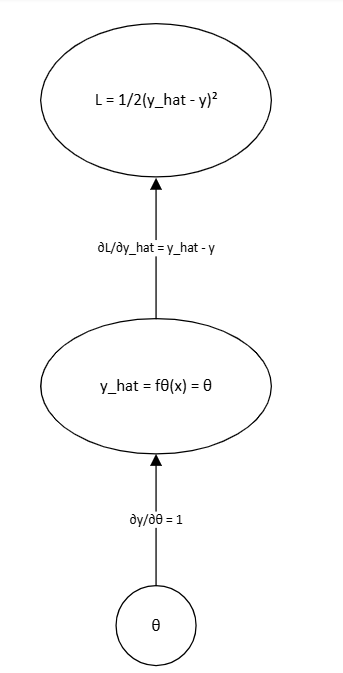
#### Question 2
Using a learning rate $\eta = 1.5$ and 15 iterations it converges.

We can determine that tha algorithm has converged if there is a very small or no change at all for theta in the iterations.
#### Question 3
If the learing rate is above 2 or below 0 there is no convergence.
#### Question 4 
The optimal learning rate is 1.
#### Question 5
We are prepared

## Task 4: Gradient Descent
Below is a simple vectorized impl. of GD that *CAN* be used as a starting point. 
Please make sure you understand exactly HOW it works (so that you could have implemented one yourself).
(Note that it uses a augmented matrix to skip the bias term).

1) Change the code to handle the bias parameter directly. (No agumented matrix).
2) Change the code to use Stochastic Gradient Descent with mini-batches. (Batch size should be 2 or more).
3) Re-organize the code and add numba as to make the SGD go pew pew (faster). To make it easier for yourself - numba does not play nice with Jupyter, so consider running it in its own python file.
4) *OPTIONAL* numba also supports GPU (https://numba.readthedocs.io/en/stable/cuda) implement GPU acceleration for SDG. (again: numba dont like notebooks)

Numba: https://numba.readthedocs.io/en/stable/


In [ ]:
import numpy as np
import plotly.express as px

# Vectorized GD without augmented matrix: handle bias separately
def predict(theta, bias, X):
    return X.dot(theta) + bias

def J_squared_residual(theta, bias, X, y):
    h = predict(theta, bias, X)
    return ((h - y)**2).sum()

def gradient_J_squared_residual(theta, bias, X, y):
    h = predict(theta, bias, X)
    error = (h - y)                         # shape (m,1)
    grad_theta = X.T.dot(error)            # shape (n_features,1)
    grad_bias = np.sum(error)              # scalar
    return grad_theta, grad_bias

# the dataset: plain features (no column of ones) and targets
X = np.array([[0.5], [1.0], [2.0]])    # shape (m, n_features)
y = np.array([[1.0], [1.5], [2.5]])    # shape (m, 1)
m, n_features = X.shape

# variables we need
theta = np.zeros((n_features, 1))    # weight vector (n_features,1)
bias = 0.0                           # scalar bias
learning_rate = 0.1

# run GD
j_history = []
n_iters = 10
for it in range(n_iters):
    j = J_squared_residual(theta, bias, X, y)
    j_history.append(j)

    grad_theta, grad_bias = gradient_J_squared_residual(theta, bias, X, y)

    # mean gradients
    grad_theta = (1/m) * grad_theta
    grad_bias = (1/m) * grad_bias

    # parameter updates
    theta = theta - learning_rate * grad_theta
    bias = bias - learning_rate * grad_bias

print("theta shape:", theta.shape)

# append the final result.
j = J_squared_residual(theta, bias, X, y)
j_history.append(j)
print("The L2 error (sum squared residuals) is: {:.6f}".format(j))

# find the L1 error.
y_pred = predict(theta, bias, X)
l1_error = np.abs(y_pred - y).sum()
print("The L1 error is: {:.6f}".format(l1_error))

# Find the R^2 
u = ((y - y_pred)**2).sum()
v = ((y - y.mean())**2).sum()
print("R^2: {:.6f}".format(1 - (u/v)))

# plot the result
fig = px.line(j_history, title="J(theta) - Loss History")
fig.show()


theta shape: (2, 1)
The L2 error is: 0.03
The L1 error is: 0.25
R^2: 0.97


# KKD Real Estate

### Note: no pandas, sklearn or similar libraries should be used, numpy, dash, numba and plotly should be sufficient. Ask if you wonder about a library.
### Implementing your own SGD/GD is a core component of this task.

The project consists of 5 parts: 

1) 
Go though the data and understand how encode the various features. 
* Clean the data for potential noise and simply wrong input.
* Make sure you identify how a linear classifier will be affected by the encoding scheme. 
* How do you handle missing data?
* How are the different features connected?
* Encode the features.

2) 
Identify objectives that could be valuable for KKD Real Estate, the objectives comes in two flavors:
* Answering questions, such as: What is a fair price for our ad packages? How is our best agent?
* Creating dashboards/interfaces that for instance: can predict the marked price for a house or maybe tell 
the probability of the house being sold in X amount of days?
* To pass the handin you at least need to implement a price model. 

3) 
Train one/many linear model(s) based on the data to solve the objectives.

4) 
Implement the dashboard interface such that we can input the nessesary parameters.
(See 'kkd_dashboard.py' on canvas for a potential starting point for the dashboard.)  
This interface should be powered by your models.

5) 
A client wants to know how the price model works, my inspecting the weights (that is: $\theta$) give a 
overview of the most important factors in the model. What are *key-drives* in the model?


### Deliverables
A presentation of the findings, a short written log of the work (bullet points / jupyter), a dashboard, and all code that you have.


### Dataset
* agents.jsonl - the real estate agents.
* districts.jsonl - the city districts
* houses.jsonl - the houses that has been on the marked the last year
* schools.jsonl - info about the schools in the districts


